# Axploratory Analysis

In [1]:
rm(list=ls())

In [2]:
library(ggplot2)
library(tseries)
library(dplyr)
library(forecast)

Warning message:
"package 'tseries' was built under R version 4.2.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'forecast' was built under R version 4.2.2"


In [3]:
folder <- getwd()
y <- read.csv(file.path(dirname(folder), "data/energy_production/final/wind_production.csv"))

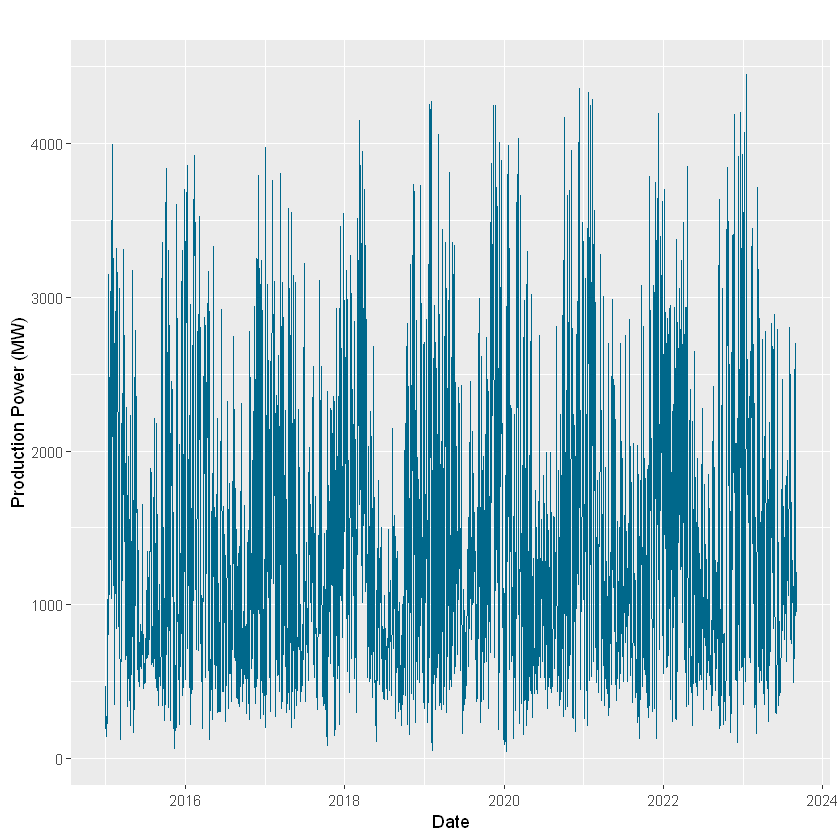

In [4]:
wind_prod <- ts(y$wind_prod, start=c(2015,1,1), frequency=365.25)
autoplot(wind_prod, col="deepskyblue4", series = "Actual Sales", xlab="Date", ylab="Production Power (MW)")

Warning message:
"Removed 182 row(s) containing missing values (geom_path)."


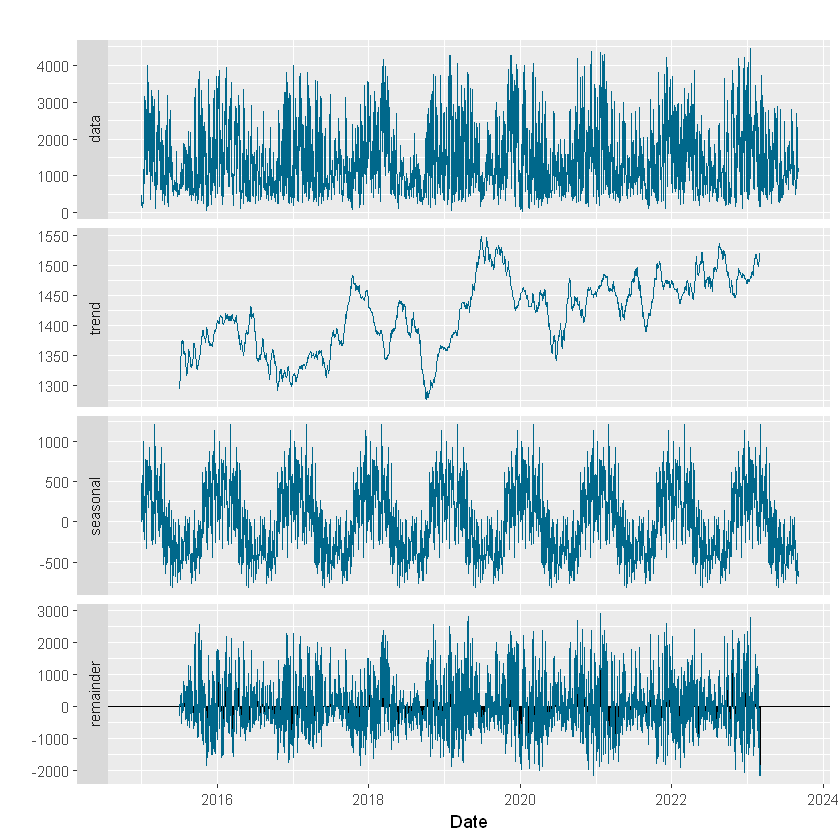

In [5]:
# Timer series decomposition
wind_prod_dec <- decompose(wind_prod, type = "additive")
autoplot(wind_prod_dec, main="", xlab="Date",range.bars=FALSE) + 
    geom_line(col="deepskyblue4")

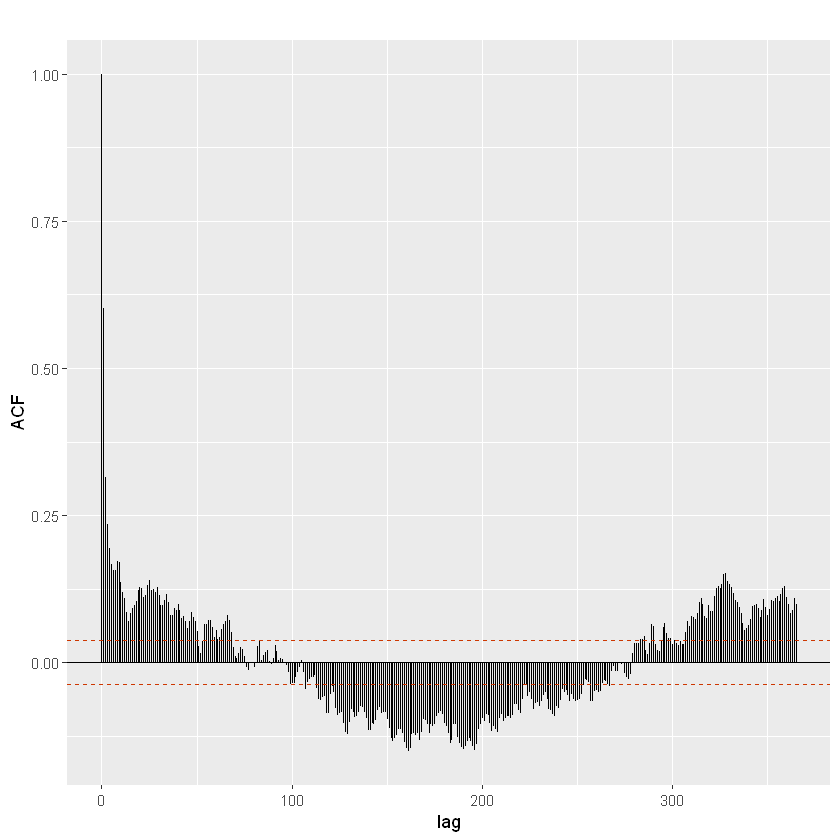

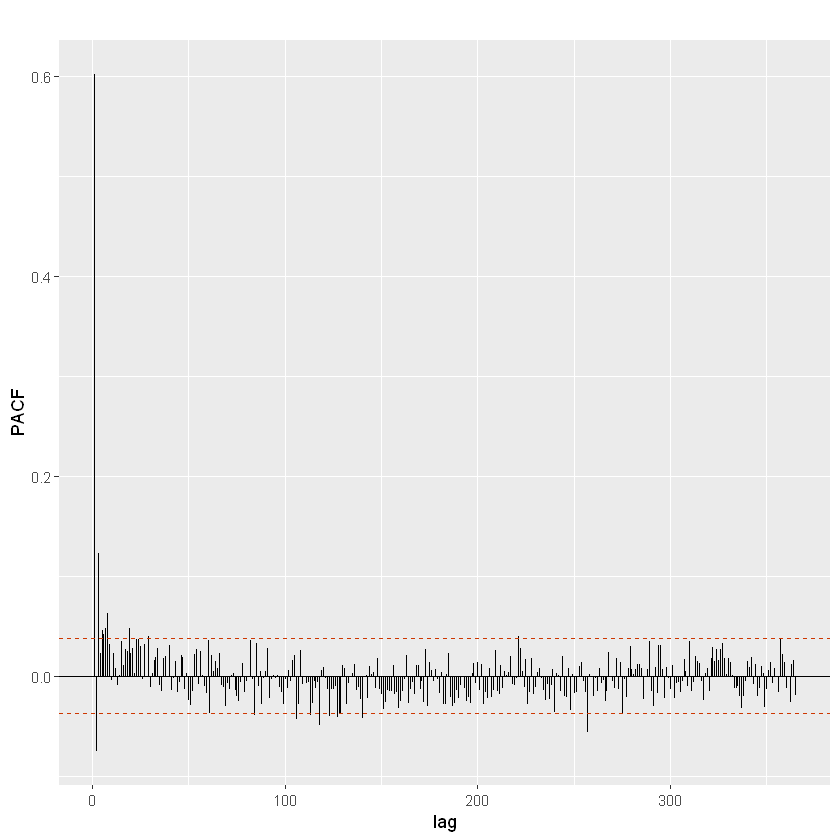

In [6]:
# ACF and PACF functions
acf1 <- Acf(wind_prod, 365,plot=F)
plotacf1 <- with(acf1, data.frame(lag, acf))
pacf1 <- Pacf(wind_prod, 365,plot=F)
plotpacf1 <- with(pacf1, data.frame(lag, acf))

lim1 <- (qnorm((1 + (1 - 0.05))/2)/sqrt(2738))
lim2 <- -lim1

ggplot(data = plotacf1, mapping = aes(x = lag, y = acf)) +
    geom_hline(aes(yintercept = 0)) +
    geom_segment(mapping = aes(xend = lag, yend = 0))+
    geom_hline(aes(yintercept = lim1), linetype = 2, color = 'orangered3')+
    geom_hline(aes(yintercept = lim2), linetype = 2, color = 'orangered3')+
    labs(title="", y="ACF")

ggplot(data = plotpacf1, mapping = aes(x = lag, y = acf)) +
    geom_hline(aes(yintercept = 0)) +
    geom_segment(mapping = aes(xend = lag, yend = 0))+
    geom_hline(aes(yintercept = lim1), linetype = 2, color = 'orangered3')+
    geom_hline(aes(yintercept = lim2), linetype = 2, color = 'orangered3')+
    labs(title="", y="PACF")

In [7]:
# Stationarity
adf.test(wind_prod, alternative = "stationary", k=12)

Warning message in adf.test(wind_prod, alternative = "stationary", k = 12):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  wind_prod
Dickey-Fuller = -11.43, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


## Training and Testing Split

In [8]:
covariates <- read.csv(file.path(dirname(folder), "data/final_covariates/covariates_2015_2023.csv"))
df <- merge(y, covariates, by = "date")

In [9]:
training <- df %>%
  filter(date <= as.Date("2022-06-30"))

testing <- df %>%
  filter(date > as.Date("2022-06-30") & date <= as.Date("2022-12-31"))

In [10]:
write.csv(training, file=file.path(dirname(folder), "data/training.csv"), row.names = FALSE)
write.csv(testing, file=file.path(dirname(folder), "data/testing.csv"), row.names = FALSE)